# **Asif Ali (24L-8024)**
# **Muhammad Khubaib Shakeel (24L-8019)**

In [115]:
# Cell 1: Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print("✅ All libraries imported successfully!")
print(f"TensorFlow Version: {tf.__version__}")

✅ All libraries imported successfully!
TensorFlow Version: 2.18.0


In [116]:
# Cell 2: Mount Kaggle dataset (for Kaggle environment)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Define dataset path
dataset_path = '/kaggle/input/sign-language-mnist'

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [117]:
# Cell 3: Load and explore the dataset
print("📊 Loading Sign Language MNIST dataset...")

# Load training and test data
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Display first few rows
print("\n📈 Training Data Head:")
display(train_df.head())

# Check for missing values
print("\n🔍 Checking for missing values:")
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")

📊 Loading Sign Language MNIST dataset...
Training data shape: (27455, 785)
Test data shape: (7172, 785)

📈 Training Data Head:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179



🔍 Checking for missing values:
Missing values in train: 0
Missing values in test: 0


🎯 Dataset Analysis
Unique classes in training set: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Unique classes in test set: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

⚠️ Missing Classes (excluding J and Z):
None

Note: J (9) and Z (25) are always excluded because they require motion.


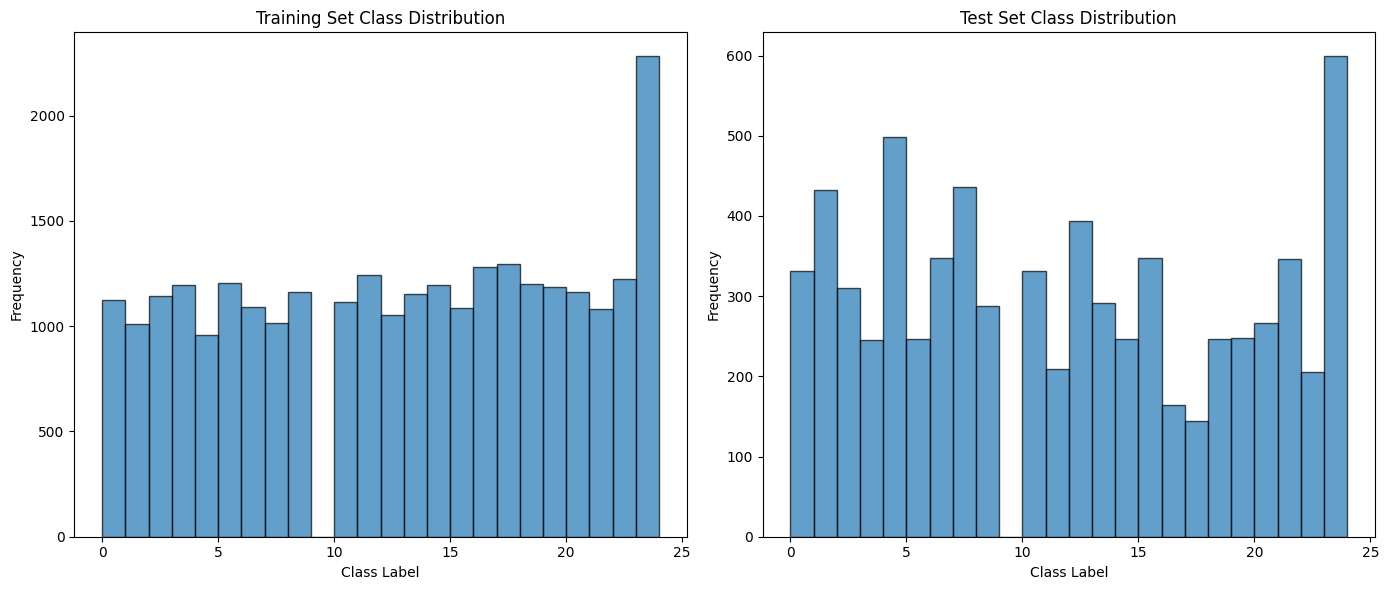


📊 Class Distribution Statistics:
Class 0 (A): Train=1126, Test=331
Class 1 (B): Train=1010, Test=432
Class 2 (C): Train=1144, Test=310
Class 3 (D): Train=1196, Test=245
Class 4 (E): Train=957, Test=498
Class 5 (F): Train=1204, Test=247
Class 6 (G): Train=1090, Test=348
Class 7 (H): Train=1013, Test=436
Class 8 (I): Train=1162, Test=288
Class 10 (K): Train=1114, Test=331
Class 11 (L): Train=1241, Test=209
Class 12 (M): Train=1055, Test=394
Class 13 (N): Train=1151, Test=291
Class 14 (O): Train=1196, Test=246
Class 15 (P): Train=1088, Test=347
Class 16 (Q): Train=1279, Test=164
Class 17 (R): Train=1294, Test=144
Class 18 (S): Train=1199, Test=246
Class 19 (T): Train=1186, Test=248
Class 20 (U): Train=1161, Test=266
Class 21 (V): Train=1082, Test=346
Class 22 (W): Train=1225, Test=206
Class 23 (X): Train=1164, Test=267
Class 24 (Y): Train=1118, Test=332


In [118]:
# Cell 4: Dataset structure and class distribution
print("🎯 Dataset Analysis")
print("=" * 60)

# Extract labels
train_labels = train_df['label'].values
test_labels = test_df['label'].values

# Unique labels found in dataset
unique_train_labels = np.unique(train_labels)
unique_test_labels = np.unique(test_labels)

print(f"Unique classes in training set: {sorted(unique_train_labels)}")
print(f"Unique classes in test set: {sorted(unique_test_labels)}")

# Identify missing classes (0–25 excluding J(9) and Z(25))
all_letters = list(range(26))
motion_letters = [9, 25]  # J and Z
valid_letters = [i for i in all_letters if i not in motion_letters]

missing_classes = [i for i in valid_letters if i not in unique_train_labels]

print("\n⚠️ Missing Classes (excluding J and Z):")
print(missing_classes if len(missing_classes) else "None")

print("\nNote: J (9) and Z (25) are always excluded because they require motion.")

# -----------------------------
# Plot class distribution
# -----------------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train_labels, bins=len(unique_train_labels), edgecolor='black', alpha=0.7)
plt.title("Training Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(test_labels, bins=len(unique_test_labels), edgecolor='black', alpha=0.7)
plt.title("Test Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# -----------------------------
# Print class balance summary
# -----------------------------
print("\n📊 Class Distribution Statistics:")
train_counts = pd.Series(train_labels).value_counts().sort_index()
test_counts = pd.Series(test_labels).value_counts().sort_index()

for label in sorted(unique_train_labels):
    char = chr(65 + label)  # convert 0=A, 1=B ...
    print(f"Class {label} ({char}): Train={train_counts[label]}, Test={test_counts.get(label, 0)}")


In [119]:
# Cell 5: Prepare image data from CSV format
print("🔄 Preparing image data from CSV format...")

# Separate labels and pixel data
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

🔄 Preparing image data from CSV format...
X_train shape: (27455, 784)
y_train shape: (27455,)
X_test shape: (7172, 784)
y_test shape: (7172,)


In [120]:
# Cell 6: Reshape and normalize the data
print("🔄 Reshaping and normalizing image data...")

# Reshape to 28x28x1 (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"Reshaped X_train: {X_train.shape}")
print(f"Reshaped X_test: {X_test.shape}")

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Pixel value range - Min: {X_train.min()}, Max: {X_train.max()}")

🔄 Reshaping and normalizing image data...
Reshaped X_train: (27455, 28, 28, 1)
Reshaped X_test: (7172, 28, 28, 1)
Pixel value range - Min: 0.0, Max: 1.0


In [121]:
# Split into train and validation BEFORE label mapping
from sklearn.model_selection import train_test_split

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(
    train_df.drop(columns=['label']).values,
    train_df['label'].values,
    test_size=0.15,
    random_state=42,
    stratify=train_df['label'].values
)

X_test_raw = test_df.drop(columns=['label']).values
y_test_raw = test_df['label'].values

print("Train/Val/Test split complete.")
print("Train shape:", X_train_raw.shape)
print("Val shape:", X_val_raw.shape)
print("Test shape:", X_test_raw.shape)

Train/Val/Test split complete.
Train shape: (23336, 784)
Val shape: (4119, 784)
Test shape: (7172, 784)


In [122]:
# Cell 7: Handle class labels (exclude J (9) and Z (25))
print("Processing class labels: mapping original labels (0..25) to 0..23 excluding J and Z")

# Build mapping: original_label -> new_label (0..23), skipping 9 and 25
skip_labels = {9, 25}   # J and Z

label_mapping = {}
reverse_mapping = {}
new_label = 0

for orig in range(26):  # 0..25
    if orig in skip_labels:
        continue
    label_mapping[orig] = new_label
    reverse_mapping[new_label] = chr(65 + orig)
    new_label += 1

# Print mapping
print("Label mapping (original -> new) and letter:")
for orig in sorted(label_mapping.keys()):
    print(f"  {orig} -> {label_mapping[orig]}  ({chr(65+orig)})")

# Mapping function
def map_labels(labels):
    mapped = []
    for lbl in labels:
        if lbl in label_mapping:
            mapped.append(label_mapping[lbl])
        else:
            raise ValueError(f"Label {lbl} not mappable (likely J=9 or Z=25).")
    return np.array(mapped, dtype=np.int32)

# Now map labels safely
y_train = map_labels(y_train_raw)
y_val   = map_labels(y_val_raw)
y_test  = map_labels(y_test_raw)

print("\nAfter mapping (unique values):")
print(" y_train:", np.unique(y_train))
print(" y_val  :", np.unique(y_val))
print(" y_test :", np.unique(y_test))

print("\nReverse mapping (new_label -> letter):")
for new_lbl in sorted(reverse_mapping.keys()):
    print(f"  {new_lbl} -> {reverse_mapping[new_lbl]}")

Processing class labels: mapping original labels (0..25) to 0..23 excluding J and Z
Label mapping (original -> new) and letter:
  0 -> 0  (A)
  1 -> 1  (B)
  2 -> 2  (C)
  3 -> 3  (D)
  4 -> 4  (E)
  5 -> 5  (F)
  6 -> 6  (G)
  7 -> 7  (H)
  8 -> 8  (I)
  10 -> 9  (K)
  11 -> 10  (L)
  12 -> 11  (M)
  13 -> 12  (N)
  14 -> 13  (O)
  15 -> 14  (P)
  16 -> 15  (Q)
  17 -> 16  (R)
  18 -> 17  (S)
  19 -> 18  (T)
  20 -> 19  (U)
  21 -> 20  (V)
  22 -> 21  (W)
  23 -> 22  (X)
  24 -> 23  (Y)

After mapping (unique values):
 y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 y_val  : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 y_test : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Reverse mapping (new_label -> letter):
  0 -> A
  1 -> B
  2 -> C
  3 -> D
  4 -> E
  5 -> F
  6 -> G
  7 -> H
  8 -> I
  9 -> K
  10 -> L
  11 -> M
  12 -> N
  13 -> O
  14 -> P
  15 -> Q
  16 -> R
  17 -> S
  18 -> T
  1

In [123]:
# Cell 8
from tensorflow.keras.utils import to_categorical
import numpy as np

print("🎯 Preprocessing labels: Remove J and Z, remap, one-hot encode...")

# Remove samples with label 9 (J) and 25 (Z)
train_mask = ~np.isin(train_labels, [9, 25])
test_mask  = ~np.isin(test_labels, [9, 25])

X_train_clean = train_df.iloc[train_mask, 1:].values.astype('float32')
y_train_clean = train_labels[train_mask]

X_test_clean  = test_df.iloc[test_mask, 1:].values.astype('float32')
y_test_clean  = test_labels[test_mask]

print(f"Training samples after removal: {X_train_clean.shape[0]}")
print(f"Test samples after removal: {X_test_clean.shape[0]}")

# Map labels 0-25 → 0-23 (skip J=9 and Z=25)
label_mapping = {}
reverse_mapping = {}
new_label = 0

for i in range(26):  # 0-25
    if i not in [9, 25]:
        label_mapping[i] = new_label
        reverse_mapping[new_label] = chr(65 + i)
        new_label += 1

# Apply mapping
y_train_mapped = np.array([label_mapping[l] for l in y_train_clean])
y_test_mapped  = np.array([label_mapping[l] for l in y_test_clean])

# One-hot encode
num_classes = 24  # A-Y excluding J and Z
y_train_categorical = to_categorical(y_train_mapped, num_classes=num_classes)
y_test_categorical  = to_categorical(y_test_mapped, num_classes=num_classes)

print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"y_test_categorical shape: {y_test_categorical.shape}")


🎯 Preprocessing labels: Remove J and Z, remap, one-hot encode...
Training samples after removal: 27455
Test samples after removal: 7172
y_train_categorical shape: (27455, 24)
y_test_categorical shape: (7172, 24)


👁️  Visualizing sample images from each class...


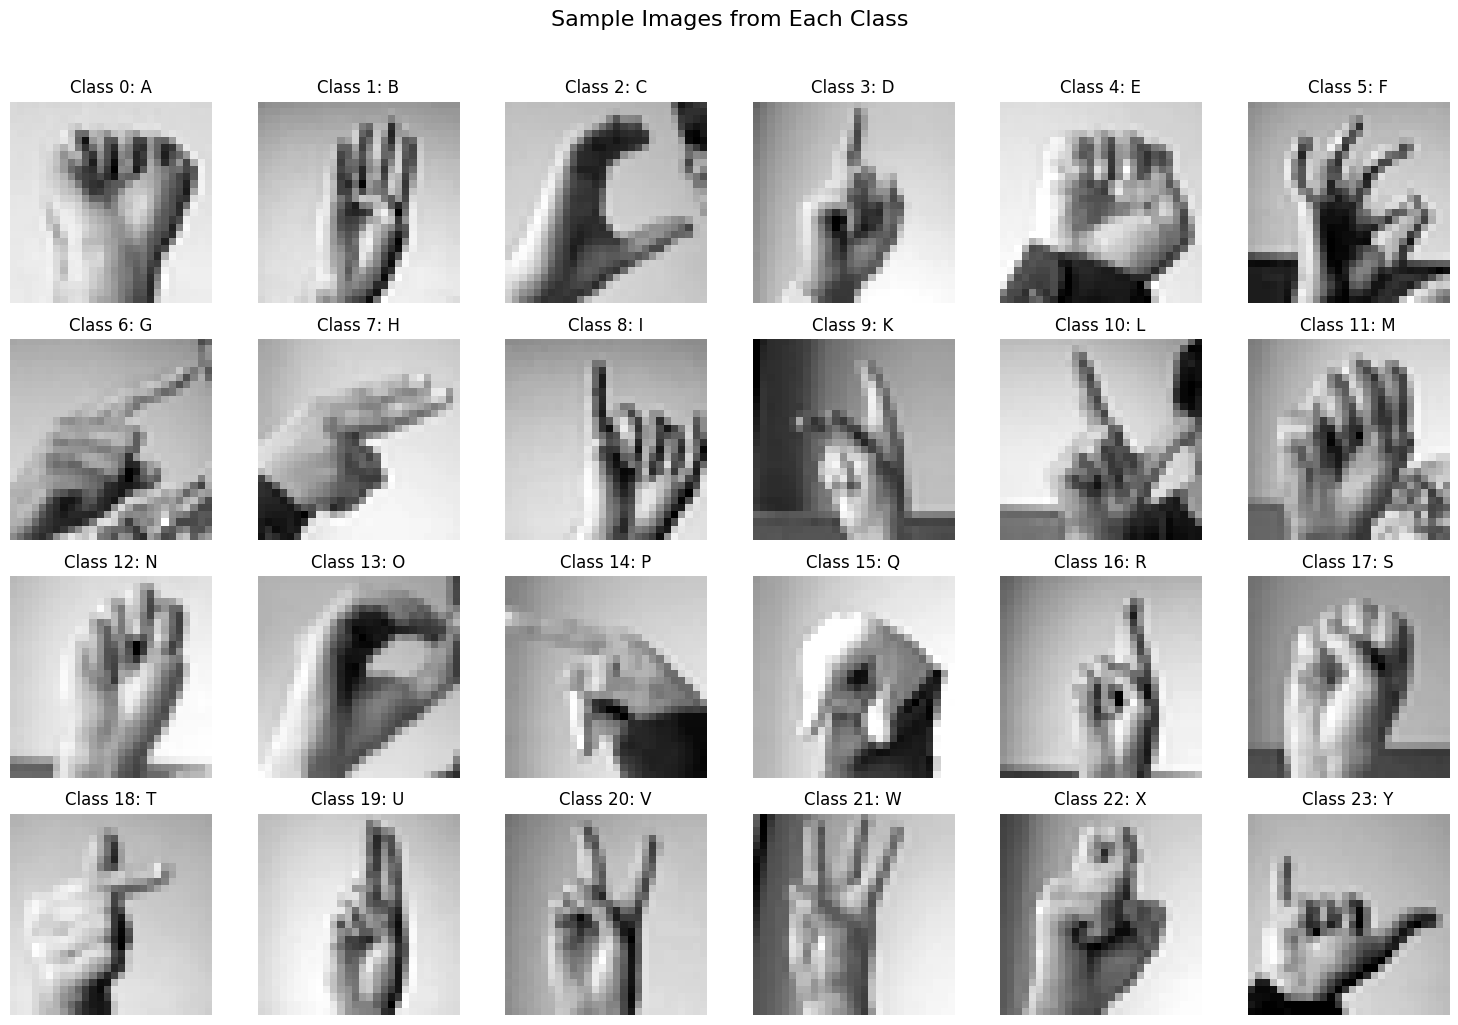

In [124]:
# Cell 9: Visualize sample images from the dataset
print("👁️  Visualizing sample images from each class...")

plt.figure(figsize=(15, 10))
for i in range(24):
    plt.subplot(4, 6, i+1)
    
    # Find first occurrence of each class
    class_indices = np.where(y_train_mapped == i)[0]
    if len(class_indices) > 0:
        sample_idx = class_indices[0]
        plt.imshow(X_train[sample_idx].reshape(28, 28), cmap='gray')
        plt.title(f'Class {i}: {reverse_mapping[i]}')
        plt.axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [125]:
# Cell 10: Create data augmentation generator
print("🔄 Setting up data augmentation...")

# Create data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,           # ±10 degrees rotation
    width_shift_range=0.1,       # ±10% width shift
    height_shift_range=0.1,      # ±10% height shift
    zoom_range=0.1,             # 0.9-1.1× zoom
    fill_mode='nearest',
    validation_split=0.15        # 15% validation split
)

print("✅ Data augmentation configuration complete!")
print("Augmentation parameters:")
print(f"  • Rotation range: ±10°")
print(f"  • Width/Height shift: ±10%")
print(f"  • Zoom range: 0.9-1.1×")
print(f"  • Validation split: 15%")

🔄 Setting up data augmentation...
✅ Data augmentation configuration complete!
Augmentation parameters:
  • Rotation range: ±10°
  • Width/Height shift: ±10%
  • Zoom range: 0.9-1.1×
  • Validation split: 15%


In [126]:
# Cell 11: Split data into training and validation sets
print("📊 Splitting data into training and validation sets...")

# Use sklearn's train_test_split for proper stratification
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_categorical, 
    test_size=0.15, 
    stratify=y_train_mapped,
    random_state=42
)

print(f"Training set: {X_train_split.shape}, {y_train_split.shape}")
print(f"Validation set: {X_val_split.shape}, {y_val_split.shape}")
print(f"Test set: {X_test.shape}, {y_test_categorical.shape}")

📊 Splitting data into training and validation sets...
Training set: (23336, 28, 28, 1), (23336, 24)
Validation set: (4119, 28, 28, 1), (4119, 24)
Test set: (7172, 28, 28, 1), (7172, 24)


In [127]:
# Cell 12: Build the CNN model architecture
print("🧠 Building CNN Model Architecture...")
print("=" * 50)

# Clear any existing models
keras.backend.clear_session()

# Define the CNN model
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                  input_shape=(28, 28, 1), name='conv1'),
    layers.BatchNormalization(name='bn1'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2'),
    layers.BatchNormalization(name='bn2'),
    layers.MaxPooling2D((2, 2), name='pool1'),
    layers.Dropout(0.25, name='dropout1'),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3'),
    layers.BatchNormalization(name='bn3'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv4'),
    layers.BatchNormalization(name='bn4'),
    layers.MaxPooling2D((2, 2), name='pool2'),
    layers.Dropout(0.25, name='dropout2'),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv5'),
    layers.BatchNormalization(name='bn5'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv6'),
    layers.BatchNormalization(name='bn6'),
    layers.MaxPooling2D((2, 2), name='pool3'),
    layers.Dropout(0.25, name='dropout3'),
    
    # Flatten and Dense Layers
    layers.Flatten(name='flatten'),
    layers.Dense(256, activation='relu', name='dense1'),
    layers.BatchNormalization(name='bn7'),
    layers.Dropout(0.5, name='dropout4'),
    layers.Dense(128, activation='relu', name='dense2'),
    layers.BatchNormalization(name='bn8'),
    layers.Dropout(0.3, name='dropout5'),
    
    # Output Layer
    layers.Dense(num_classes, activation='softmax', name='output')
])

# Display model summary
model.summary()

print("\n✅ Model architecture built successfully!")
print(f"Total parameters: {model.count_params():,}")

🧠 Building CNN Model Architecture...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn8 (BatchNormalization)        │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout5 (Dropout)              │ (None, 128)            │             

 Total params: 620,920 (2.37 MB)

 Trainable params: 619,256 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)


✅ Model architecture built successfully!
Total parameters: 620,920


📊 Visualizing Model Architecture...


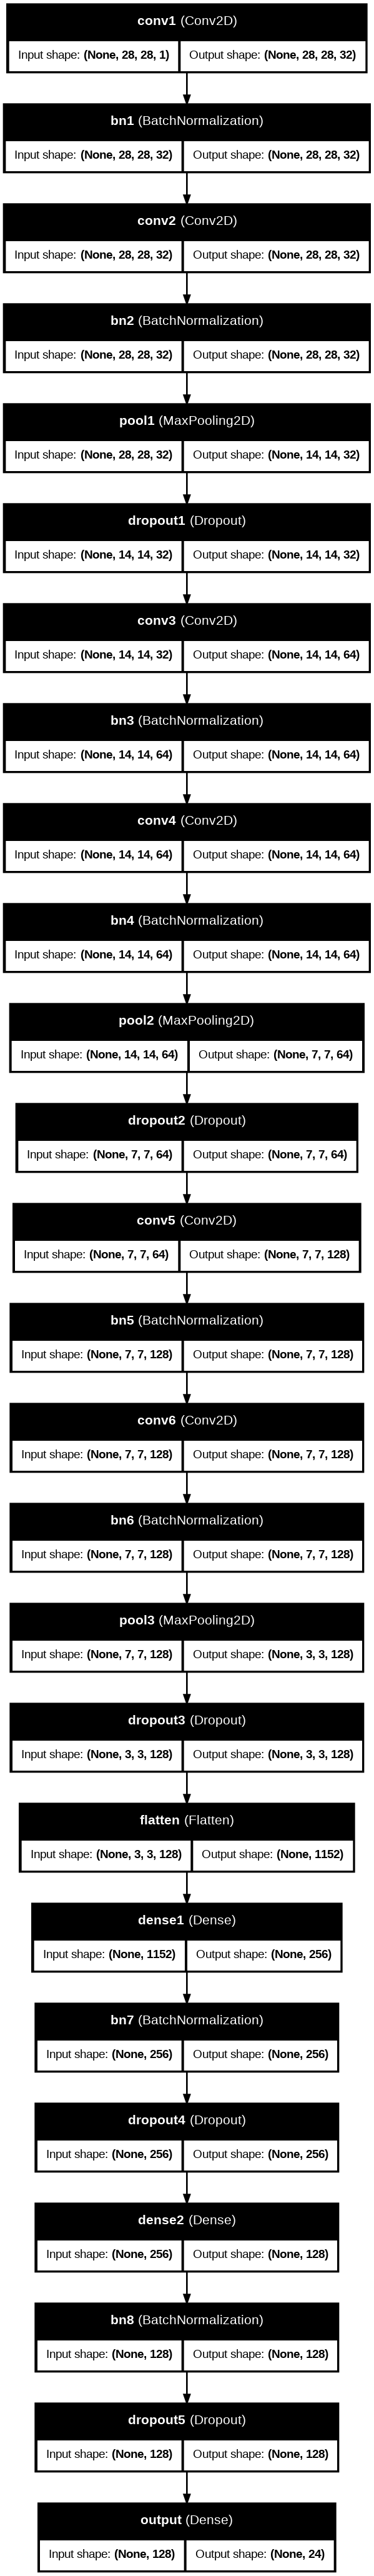

In [128]:
# Cell 13: Visualize the model architecture
print("📊 Visualizing Model Architecture...")

# Plot model architecture
keras.utils.plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

# Display the plot
from IPython.display import Image
Image(filename='model_architecture.png')

In [129]:
# Cell 14: Compile the model
print("⚙️  Compiling the model...")

# Define optimizer with learning rate schedule
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

print("✅ Model compiled successfully!")
print(f"Optimizer: Adam with learning rate={initial_learning_rate}")
print("Loss: Categorical Crossentropy")
print("Metrics: Accuracy, Precision, Recall")

⚙️  Compiling the model...
✅ Model compiled successfully!
Optimizer: Adam with learning rate=0.001
Loss: Categorical Crossentropy
Metrics: Accuracy, Precision, Recall


In [130]:
# Cell 15: Define callbacks and training parameters
print("🎯 Setting up training callbacks...")

# Define callbacks
callbacks_list = [
    # Early stopping
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate on plateau
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    
    # Model checkpoint
    callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    
    # TensorBoard for visualization
    callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1,
        write_graph=True,
        write_images=True
    )
]

print("✅ Callbacks configured:")
print("  1. Early Stopping (patience=10)")
print("  2. ReduceLROnPlateau (factor=0.5, patience=5)")
print("  3. Model Checkpoint")
print("  4. TensorBoard")

🎯 Setting up training callbacks...
✅ Callbacks configured:
  1. Early Stopping (patience=10)
  2. ReduceLROnPlateau (factor=0.5, patience=5)
  3. Model Checkpoint
  4. TensorBoard


In [131]:
# Cell 16: Train the model 
print("🚀 Starting Model Training...")
print("=" * 50)

# Training parameters
batch_size = 64
epochs = 50

# Update the optimizer to use a fixed learning rate instead of schedule
# This fixes the learning rate schedule conflict with ReduceLROnPlateau
initial_learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Recompile the model with the updated optimizer
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

print("✅ Model recompiled with fixed learning rate for compatibility")

# Update callbacks (remove the conflicting ones)
callbacks_list = [
    # Early stopping
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate on plateau (now compatible with fixed LR)
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    
    # Model checkpoint
    callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

print("\n📋 Updated Training Configuration:")
print(f"• Batch size: {batch_size}")
print(f"• Max epochs: {epochs}")
print(f"• Initial learning rate: {initial_learning_rate}")
print(f"• Training samples: {X_train_split.shape[0]}")
print(f"• Validation samples: {X_val_split.shape[0]}")

print("\n🎯 Callbacks configured:")
print("  1. Early Stopping (patience=10, restore_best_weights=True)")
print("  2. ReduceLROnPlateau (factor=0.5, patience=5, min_lr=1e-6)")
print("  3. Model Checkpoint (saves best model)")

# Create a separate generator for validation (no augmentation)
val_datagen = ImageDataGenerator()

# Train the model
print("\n" + "="*50)
print("⏳ Training in progress...")

history = model.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=batch_size),
    steps_per_epoch=len(X_train_split) // batch_size,
    epochs=epochs,
    validation_data=val_datagen.flow(X_val_split, y_val_split, batch_size=batch_size),
    validation_steps=len(X_val_split) // batch_size,
    callbacks=callbacks_list,
    verbose=1
)

print("\n" + "="*50)
print("✅ Training completed successfully!")

# Display training summary
final_epoch = len(history.history['loss'])
print(f"\n📊 Training Summary:")
print(f"  • Total epochs trained: {final_epoch}")
print(f"  • Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"  • Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"  • Final training loss: {history.history['loss'][-1]:.4f}")
print(f"  • Final validation loss: {history.history['val_loss'][-1]:.4f}")

# Check if early stopping was triggered
if final_epoch < epochs:
    print(f"\n⏹️  Early stopping triggered at epoch {final_epoch}")
    print(f"   Best validation loss: {min(history.history['val_loss']):.4f}")
    print(f"   Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
else:
    print(f"\n⏱️  Training completed all {epochs} epochs")

🚀 Starting Model Training...
✅ Model recompiled with fixed learning rate for compatibility

📋 Updated Training Configuration:
• Batch size: 64
• Max epochs: 50
• Initial learning rate: 0.001
• Training samples: 23336
• Validation samples: 4119

🎯 Callbacks configured:
  1. Early Stopping (patience=10, restore_best_weights=True)
  2. ReduceLROnPlateau (factor=0.5, patience=5, min_lr=1e-6)
  3. Model Checkpoint (saves best model)

⏳ Training in progress...
Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2713 - loss: 2.6542 - precision: 0.4878 - recall: 0.1299
Epoch 1: val_accuracy improved from -inf to 0.16406, saving model to best_model.keras
364/364 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.2718 - loss: 2.6518 - precision: 0.4885 - recall: 0.1304 - val_accuracy: 0.1641 - val_loss: 2.6735 - val_precision: 0.1698 - val_recall: 0.0840 - learning_rate: 0.0010
Epoch 2/50
  1/364 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7500 - loss: 0.7395 - precision: 0.8864 

In [132]:
# Cell 17: Load the best model
print("📥 Loading the best saved model...")

# Load the best model from checkpoint
best_model = keras.models.load_model('best_model.keras')
print("✅ Best model loaded successfully!")

📥 Loading the best saved model...
✅ Best model loaded successfully!


📈 Plotting Training History...


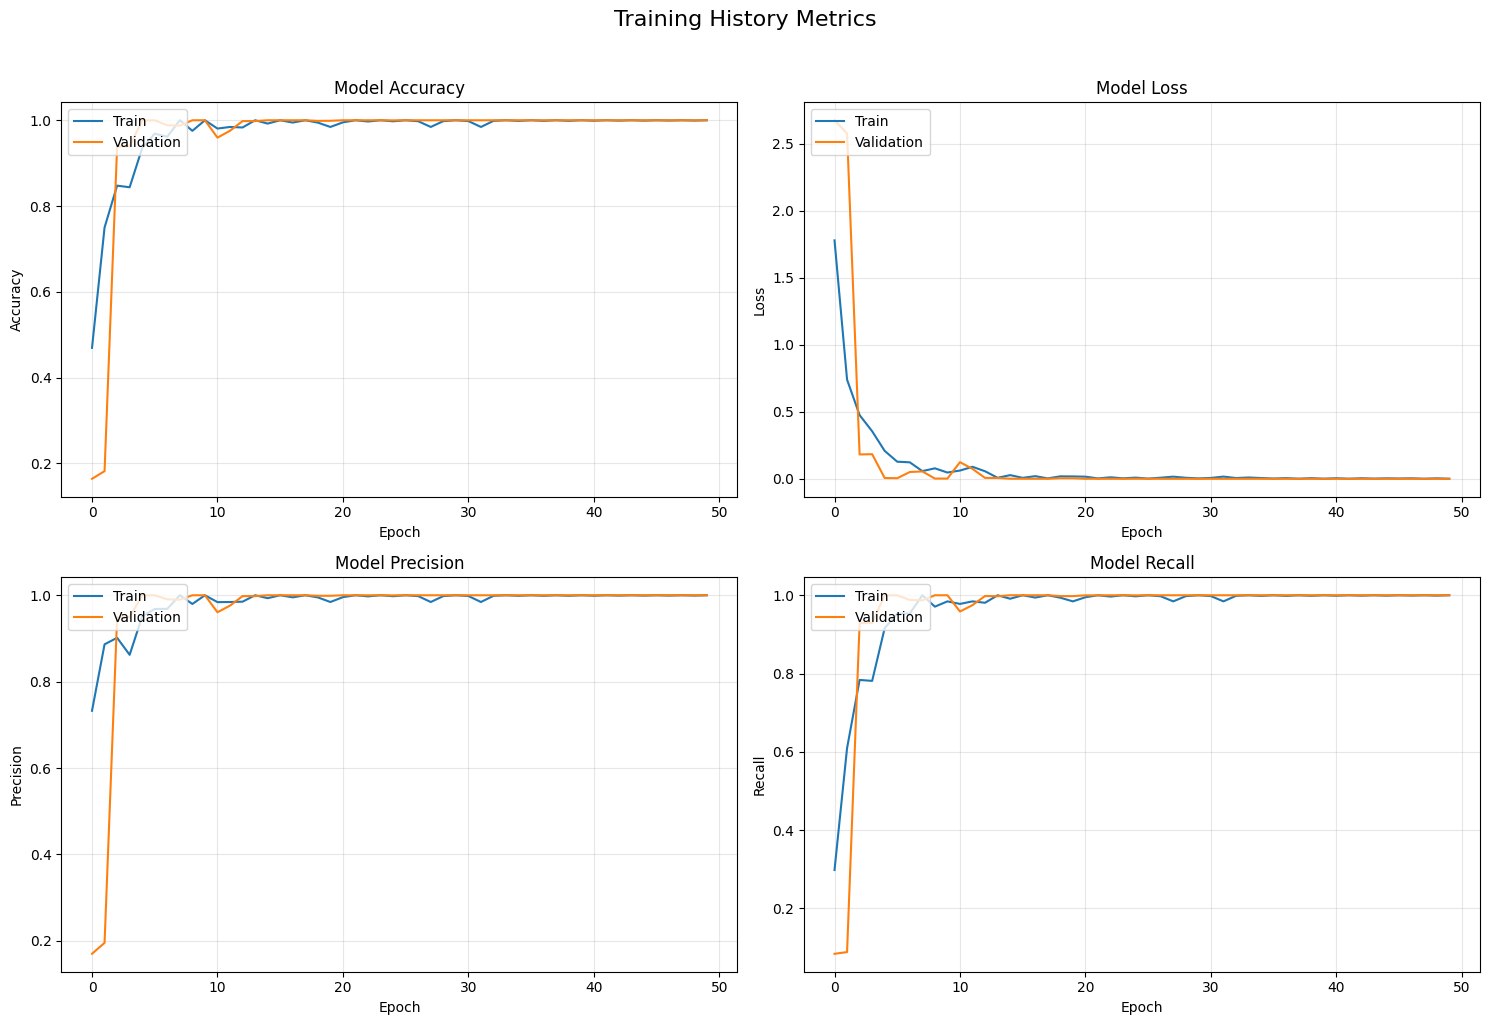

In [133]:
# Cell 18: Plot training history
print("📈 Plotting Training History...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot training & validation accuracy
axes[0, 0].plot(history.history['accuracy'])
axes[0, 0].plot(history.history['val_accuracy'])
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend(['Train', 'Validation'], loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# Plot training & validation loss
axes[0, 1].plot(history.history['loss'])
axes[0, 1].plot(history.history['val_loss'])
axes[0, 1].set_title('Model Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].legend(['Train', 'Validation'], loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# Plot precision
axes[1, 0].plot(history.history['precision'])
axes[1, 0].plot(history.history['val_precision'])
axes[1, 0].set_title('Model Precision')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend(['Train', 'Validation'], loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Plot recall
axes[1, 1].plot(history.history['recall'])
axes[1, 1].plot(history.history['val_recall'])
axes[1, 1].set_title('Model Recall')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend(['Train', 'Validation'], loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Training History Metrics', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [134]:
# Cell 19: Evaluate model on test set
print("🧪 Evaluating Model on Test Set...")
print("=" * 50)

# Make predictions
y_pred_proba = best_model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Calculate metrics
test_accuracy = accuracy_score(y_true, y_pred)
test_loss, test_acc, test_precision, test_recall = best_model.evaluate(X_test, y_test_categorical, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Calculate F1-score
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-7)
print(f"Test F1-Score: {test_f1:.4f}")

# Check if we met our accuracy objective
print("\n🎯 Project Objective Check:")
objective_accuracy = 0.95
if test_accuracy >= objective_accuracy:
    print(f"✅ SUCCESS: Achieved accuracy of {test_accuracy*100:.2f}% (Target: {objective_accuracy*100}%)")
else:
    print(f"⚠️  PARTIAL SUCCESS: Accuracy of {test_accuracy*100:.2f}% (Target: {objective_accuracy*100}%)")

🧪 Evaluating Model on Test Set...
Test Loss: 0.0106
Test Accuracy: 0.9994 (99.94%)
Test Precision: 0.9994
Test Recall: 0.9994
Test F1-Score: 0.9994

🎯 Project Objective Check:
✅ SUCCESS: Achieved accuracy of 99.94% (Target: 95.0%)


In [135]:
# Cell 20: Detailed classification report
print("📊 Detailed Classification Report")
print("=" * 50)

# Generate classification report
class_names = [reverse_mapping[i] for i in range(num_classes)]
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

# Calculate per-class accuracy
print("\n📈 Per-Class Accuracy:")
per_class_acc = {}
for i in range(num_classes):
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:
        class_acc = np.sum(y_pred[class_mask] == i) / np.sum(class_mask)
        per_class_acc[class_names[i]] = class_acc
        print(f"  Class {class_names[i]}: {class_acc:.4f} ({class_acc*100:.2f}%)")

# Identify weakest classes
weakest_classes = sorted(per_class_acc.items(), key=lambda x: x[1])[:5]
print(f"\n🔍 Weakest performing classes:")
for class_name, acc in weakest_classes:
    print(f"  {class_name}: {acc*100:.2f}%")

📊 Detailed Classification Report
              precision    recall  f1-score   support

           A     1.0000    1.0000    1.0000       331
           B     1.0000    1.0000    1.0000       432
           C     1.0000    1.0000    1.0000       310
           D     1.0000    1.0000    1.0000       245
           E     0.9960    1.0000    0.9980       498
           F     1.0000    1.0000    1.0000       247
           G     1.0000    1.0000    1.0000       348
           H     1.0000    1.0000    1.0000       436
           I     0.9965    1.0000    0.9983       288
           K     1.0000    1.0000    1.0000       331
           L     1.0000    1.0000    1.0000       209
           M     0.9975    1.0000    0.9987       394
           N     1.0000    0.9966    0.9983       291
           O     1.0000    1.0000    1.0000       246
           P     1.0000    1.0000    1.0000       347
           Q     1.0000    1.0000    1.0000       164
           R     1.0000    1.0000    1.0000     

📋 Confusion Matrix Visualization


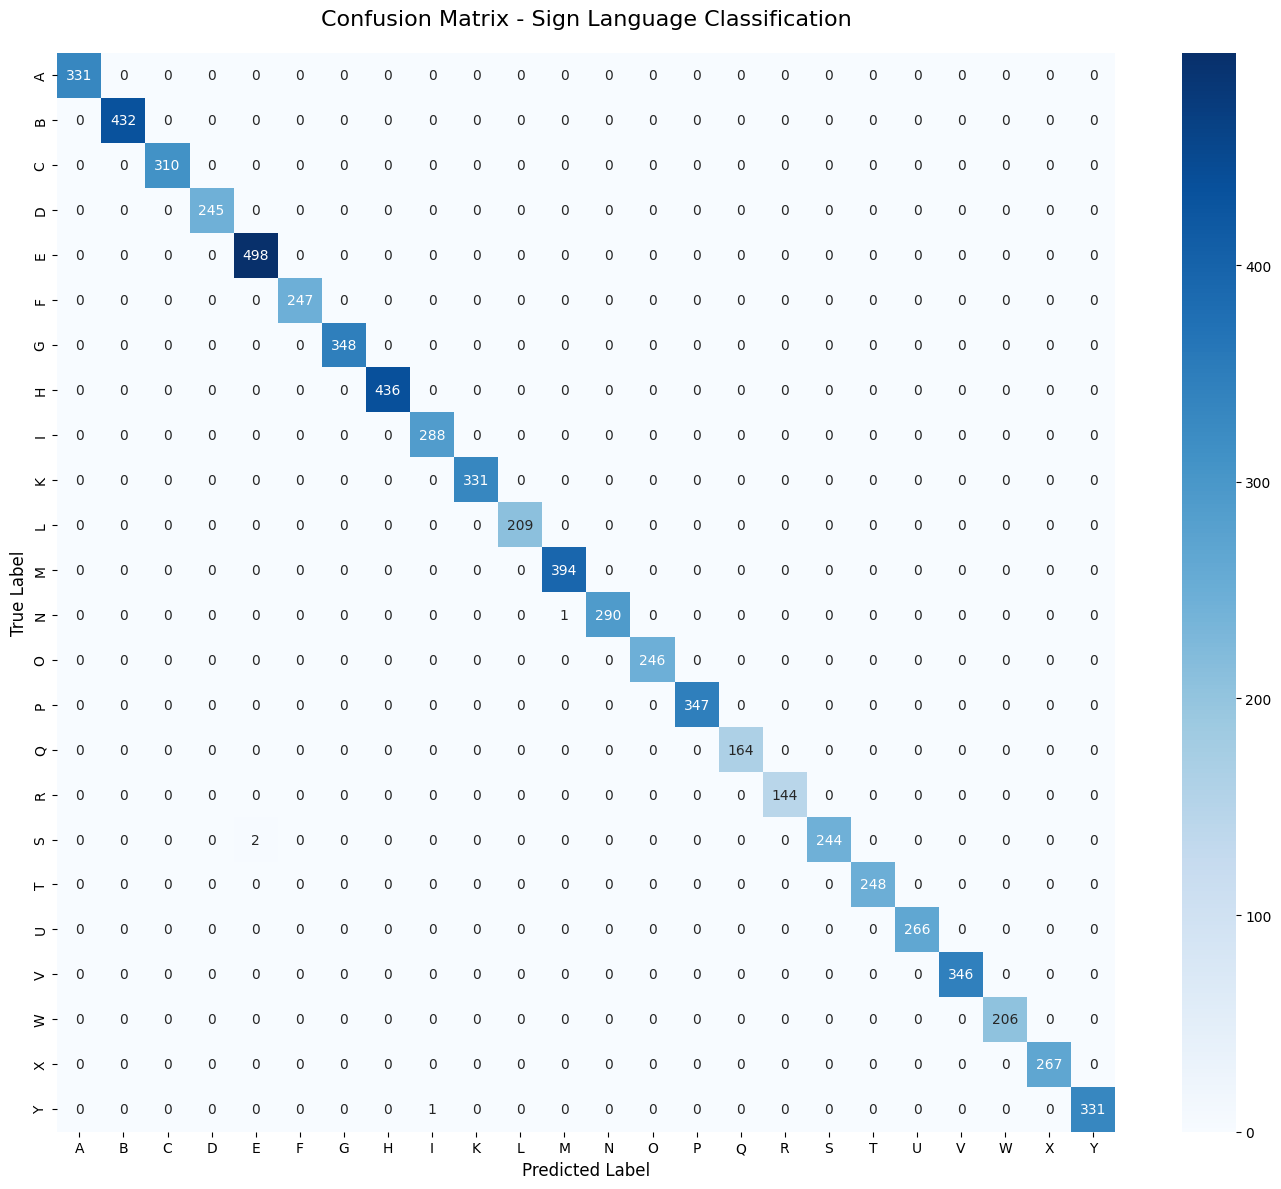


🔍 Most Common Misclassifications:
Top 10 most frequent misclassifications:


In [136]:
# Cell 21: Confusion Matrix
print("📋 Confusion Matrix Visualization")
print("=" * 50)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Sign Language Classification', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Identify common misclassifications
print("\n🔍 Most Common Misclassifications:")
misclassifications = []
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and cm[i, j] > 10:  # Only show significant misclassifications
            misclassifications.append((i, j, cm[i, j]))

# Sort by frequency
misclassifications.sort(key=lambda x: x[2], reverse=True)

print("Top 10 most frequent misclassifications:")
for i, j, count in misclassifications[:10]:
    print(f"  {class_names[i]} → {class_names[j]}: {count} instances")

👁️  Visualizing Model Predictions
Correct predictions: 7168
Incorrect predictions: 4

✅ Sample Correct Predictions:


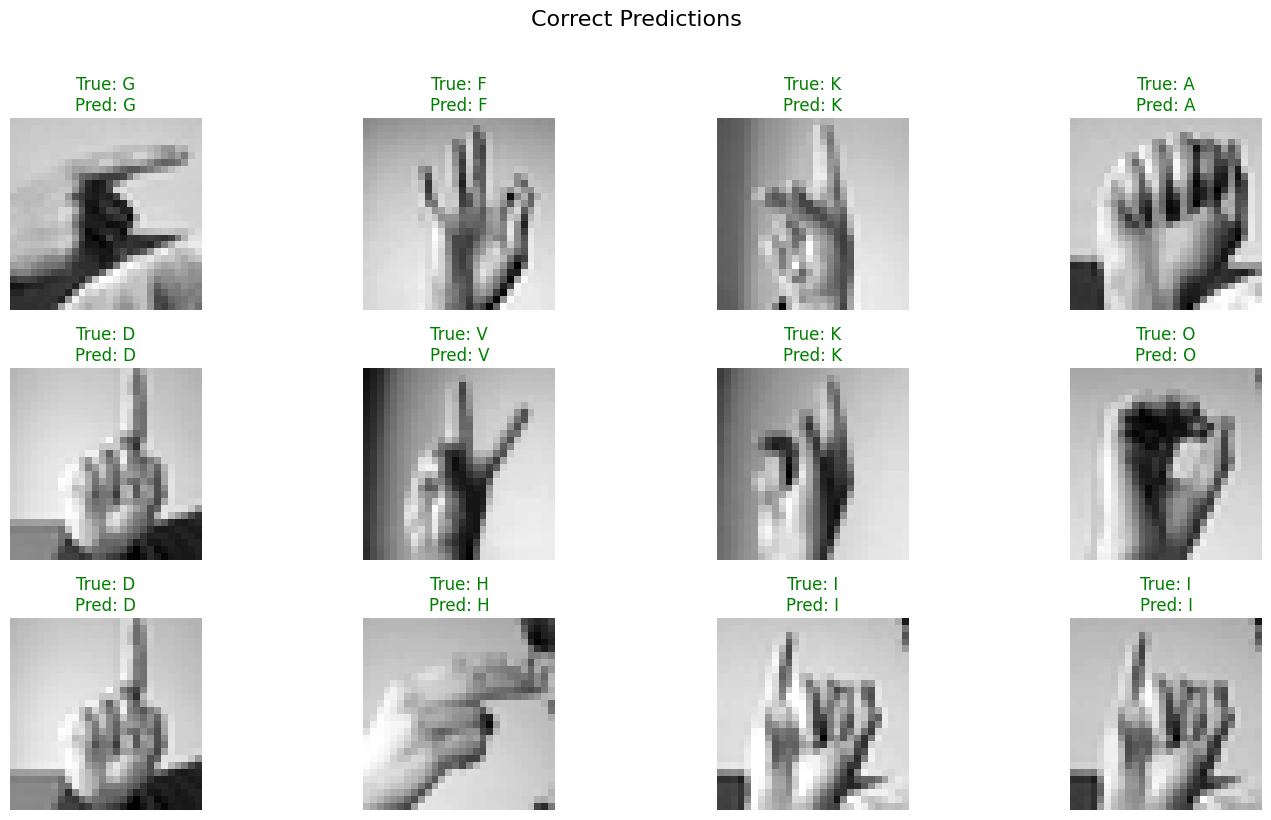


❌ Sample Incorrect Predictions:


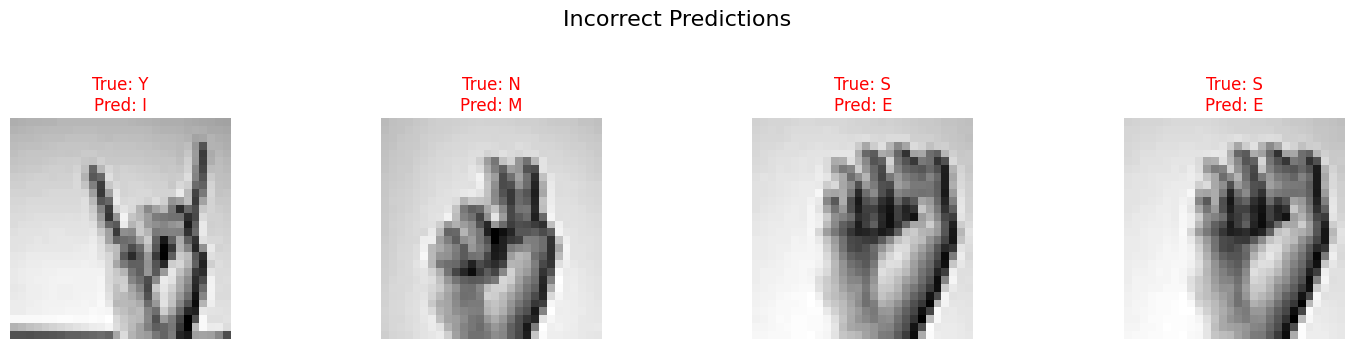

In [137]:
# Cell 22: Visualize correct and incorrect predictions
print("👁️  Visualizing Model Predictions")
print("=" * 50)

# Get indices of correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

print(f"Correct predictions: {len(correct_indices)}")
print(f"Incorrect predictions: {len(incorrect_indices)}")

# Sample some correct predictions
print("\n✅ Sample Correct Predictions:")
plt.figure(figsize=(15, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    idx = correct_indices[i]
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='green')
    plt.axis('off')
plt.suptitle('Correct Predictions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Sample some incorrect predictions
print("\n❌ Sample Incorrect Predictions:")
plt.figure(figsize=(15, 8))
for i in range(min(12, len(incorrect_indices))):
    plt.subplot(3, 4, i+1)
    idx = incorrect_indices[i]
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')
plt.suptitle('Incorrect Predictions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [138]:
# Cell 23: Visualizing Feature Maps 
print("🔍 Visualizing Feature Maps")
print("=" * 50)

# First, let's ensure we have a model to work with
print("🔄 Checking model availability...")

# Check if best_model exists
model_to_use = None
model_name = ""

if 'best_model' in locals() or 'best_model' in globals():
    model_to_use = best_model
    model_name = "best_model"
    print(f"✅ Using {model_name}")
elif 'model' in locals() or 'model' in globals():
    model_to_use = model
    model_name = "trained model"
    print(f"✅ Using {model_name}")
else:
    print("❌ No model found. Please run training cells first.")
    # Try to load from file as last resort
    try:
        model_to_use = keras.models.load_model('best_model.keras')
        model_name = "loaded best_model.keras"
        print(f"✅ Loaded model from file: {model_name}")
    except Exception as e:
        print(f"❌ Could not load model: {e}")
        model_to_use = None

if model_to_use is not None:
    print(f"\n📋 Model Information:")
    print(f"   • Model name: {model_name}")
    print(f"   • Number of layers: {len(model_to_use.layers)}")
    
    # Build the model explicitly if needed
    print("\n🔄 Ensuring model is built...")
    
    # Method 1: Use build() method if available
    try:
        # Explicitly build the model
        model_to_use.build(input_shape=(None, 28, 28, 1))
        print("✅ Model built using build() method")
    except Exception as e1:
        print(f"⚠️  Could not build with build() method: {e1}")
        
        # Method 2: Call model on sample data
        try:
            # Get a sample from X_test
            sample_input = X_test[:1]  # Take first sample
            _ = model_to_use.predict(sample_input, verbose=0)
            print("✅ Model built using predict() on sample data")
        except Exception as e2:
            print(f"❌ Could not build model: {e2}")
            print("   Skipping feature map visualization.")
            model_to_use = None

if model_to_use is not None:
    print("\n🔄 Preparing to visualize feature maps...")
    
    # List all layer names to see what we have
    print("\n📋 Available layers:")
    for i, layer in enumerate(model_to_use.layers):
        layer_type = type(layer).__name__
        print(f"  {i:2d}. {layer.name:20s} ({layer_type})")
    
    # Select layers for visualization (convolutional and pooling layers)
    selected_layers = []
    selected_layer_names = []
    
    for layer in model_to_use.layers:
        if 'conv' in layer.name.lower() or 'pool' in layer.name.lower():
            selected_layers.append(layer)
            selected_layer_names.append(layer.name)
    
    print(f"\n✅ Selected {len(selected_layers)} layers for visualization:")
    for i, (layer, name) in enumerate(zip(selected_layers, selected_layer_names)):
        print(f"  {i+1}. {name}")
    
    if len(selected_layers) == 0:
        print("❌ No convolutional or pooling layers found in the model.")
    else:
        # Take at most 8 layers
        selected_layers = selected_layers[:8]
        selected_layer_names = selected_layer_names[:8]
        
        # Create activation model
        print(f"\n🔄 Creating activation model with {len(selected_layers)} layers...")
        
        try:
            # Create a new model that outputs intermediate layer activations
            activation_model = keras.Model(
                inputs=model_to_use.input,
                outputs=[layer.output for layer in selected_layers]
            )
            
            print("✅ Activation model created successfully!")
            
            # Get a sample image
            sample_idx = 0  # Use first test image
            sample_image = X_test[sample_idx:sample_idx+1]
            
            # Get the true label
            if 'y_true' in locals() and 'class_names' in locals():
                true_label_idx = y_true[sample_idx]
                true_label = class_names[true_label_idx]
                label_info = f"(True Label: {true_label})"
            else:
                label_info = ""
            
            print(f"\n🔄 Generating activations for sample image {label_info}...")
            
            # Get activations
            activations = activation_model.predict(sample_image, verbose=0)
            
            print(f"✅ Generated {len(activations)} activation maps")
            
            # Visualize feature maps
            n_layers = len(activations)
            n_cols = 4
            n_rows = (n_layers + n_cols - 1) // n_cols
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
            
            if n_rows == 1:
                axes = axes.reshape(1, -1)
            
            for i in range(n_layers):
                row = i // n_cols
                col = i % n_cols
                ax = axes[row, col]
                
                activation = activations[i]
                layer_name = selected_layer_names[i]
                
                # For 4D activations (batch, height, width, channels)
                if len(activation.shape) == 4:
                    # Take first filter/channel for visualization
                    if activation.shape[-1] > 0:
                        feature_map = activation[0, :, :, 0]
                        
                        # Normalize for display
                        feature_map_normalized = (feature_map - feature_map.min()) / (
                            feature_map.max() - feature_map.min() + 1e-8
                        )
                        
                        # Display
                        im = ax.imshow(feature_map_normalized, cmap='viridis')
                        ax.set_title(f'{layer_name}\n{feature_map.shape}')
                        
                        # Add colorbar for the first plot
                        if i == 0:
                            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
                    else:
                        ax.text(0.5, 0.5, 'No channels', 
                               ha='center', va='center', transform=ax.transAxes)
                        ax.set_title(f'{layer_name}\n{activation.shape}')
                else:
                    # For other layer types
                    ax.text(0.5, 0.5, f'Shape: {activation.shape}', 
                           ha='center', va='center', transform=ax.transAxes)
                    ax.set_title(f'{layer_name}\n{activation.shape}')
                
                ax.axis('off')
            
            # Hide empty subplots
            for i in range(n_layers, n_rows * n_cols):
                row = i // n_cols
                col = i % n_cols
                axes[row, col].axis('off')
            
            plt.suptitle(f'Feature Maps for Sample Image {label_info}', fontsize=16, y=1.02)
            plt.tight_layout()
            plt.show()
            
            # Show original image
            print("\n🔍 Original Image:")
            plt.figure(figsize=(6, 6))
            plt.imshow(sample_image[0].reshape(28, 28), cmap='gray')
            plt.title(f'Original Image {label_info}')
            plt.axis('off')
            plt.show()
            
            print("\n📝 Feature Map Analysis:")
            print("=" * 40)
            for i, (layer_name, activation) in enumerate(zip(selected_layer_names, activations)):
                print(f"{i+1}. {layer_name}:")
                print(f"   • Shape: {activation.shape}")
                if len(activation.shape) == 4:
                    print(f"   • Filters/Channels: {activation.shape[-1]}")
                    # Calculate activation statistics
                    mean_act = np.mean(activation)
                    std_act = np.std(activation)
                    max_act = np.max(activation)
                    min_act = np.min(activation)
                    print(f"   • Mean activation: {mean_act:.4f}")
                    print(f"   • Std activation: {std_act:.4f}")
                    print(f"   • Range: [{min_act:.4f}, {max_act:.4f}]")
                print()
            
        except Exception as e:
            print(f"❌ Error creating activation model: {e}")
            print("\n🔄 Trying alternative approach...")
            
            # Alternative: Show model summary instead
            print("\n📋 Model Summary:")
            model_to_use.summary()

print("\n" + "="*50)
print("✅ Feature map visualization attempt completed!")
print("="*50)

🔍 Visualizing Feature Maps
🔄 Checking model availability...
✅ Using best_model

📋 Model Information:
   • Model name: best_model
   • Number of layers: 26

🔄 Ensuring model is built...
✅ Model built using build() method

🔄 Preparing to visualize feature maps...

📋 Available layers:
   0. conv1                (Conv2D)
   1. bn1                  (BatchNormalization)
   2. conv2                (Conv2D)
   3. bn2                  (BatchNormalization)
   4. pool1                (MaxPooling2D)
   5. dropout1             (Dropout)
   6. conv3                (Conv2D)
   7. bn3                  (BatchNormalization)
   8. conv4                (Conv2D)
   9. bn4                  (BatchNormalization)
  10. pool2                (MaxPooling2D)
  11. dropout2             (Dropout)
  12. conv5                (Conv2D)
  13. bn5                  (BatchNormalization)
  14. conv6                (Conv2D)
  15. bn6                  (BatchNormalization)
  16. pool3                (MaxPooling2D)
  17. dropout

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn8 (BatchNormalization)        │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout5 (Dropout)              │ (None, 128)            │             

 Total params: 1,859,434 (7.09 MB)

 Trainable params: 619,256 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

 Optimizer params: 1,238,514 (4.72 MB)


✅ Feature map visualization attempt completed!


In [139]:
# Cell 24: Create a prediction function for new images
print("🎯 Creating Prediction Interface")
print("=" * 50)

class SignLanguagePredictor:
    def __init__(self, model, class_mapping):
        self.model = model
        # FIX: Directly use the mapping provided without inverting it
        # We assume class_mapping is already {index: label} (like your reverse_mapping)
        self.reverse_mapping = class_mapping
        
    def preprocess_image(self, image_array):
        """Preprocess a single image for prediction"""
        # Ensure image is grayscale
        if len(image_array.shape) == 3 and image_array.shape[2] == 3:
            # Convert RGB to grayscale
            image_array = np.mean(image_array, axis=2)
        
        # Resize to 28x28 if needed
        if image_array.shape != (28, 28):
            from skimage.transform import resize
            image_array = resize(image_array, (28, 28), anti_aliasing=True)
        
        # Normalize
        image_array = image_array.astype('float32') / 255.0
        
        # Add batch and channel dimensions
        image_array = np.expand_dims(image_array, axis=(0, -1))
        
        return image_array
    
    def predict(self, image_array):
        """Predict class for an image"""
        # Preprocess
        processed_image = self.preprocess_image(image_array)
        
        # Predict
        predictions = self.model.predict(processed_image, verbose=0)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        
        # Get letter
        # Now this lookup will work correctly with an integer key
        letter = self.reverse_mapping.get(predicted_class, 'Unknown')
        
        return {
            'letter': letter,
            'class': predicted_class,
            'confidence': float(confidence),
            'all_predictions': predictions[0].tolist()
        }
    
    def predict_multiple(self, image_arrays):
        """Predict classes for multiple images"""
        predictions = []
        for img in image_arrays:
            predictions.append(self.predict(img))
        return predictions

# Create predictor instance
# We pass reverse_mapping which is {0: 'A', 1: 'B', ...}
predictor = SignLanguagePredictor(best_model, reverse_mapping)
print("✅ Predictor class created successfully!")

🎯 Creating Prediction Interface
✅ Predictor class created successfully!


In [140]:
# Cell 25: Test the predictor with sample images
print("🧪 Testing Predictor Interface")
print("=" * 50)

# Test with 5 random test images
test_indices = np.random.choice(len(X_test), 5, replace=False)

print("Sample Predictions:")
print("-" * 40)
for idx in test_indices:
    # Get image and true label
    test_image = X_test[idx].reshape(28, 28)
    true_label_idx = y_true[idx]
    true_letter = class_names[true_label_idx]
    
    # Make prediction
    prediction = predictor.predict(test_image)
    
    # Display result
    print(f"Image {idx}:")
    print(f"  True Letter: {true_letter}")
    print(f"  Predicted: {prediction['letter']}")
    print(f"  Confidence: {prediction['confidence']:.4f}")
    print(f"  Correct: {'✅' if prediction['letter'] == true_letter else '❌'}")
    print()

🧪 Testing Predictor Interface
Sample Predictions:
----------------------------------------
Image 3149:
  True Letter: V
  Predicted: K
  Confidence: 0.3792
  Correct: ❌

Image 2495:
  True Letter: Q
  Predicted: K
  Confidence: 0.3903
  Correct: ❌

Image 3406:
  True Letter: L
  Predicted: K
  Confidence: 0.3890
  Correct: ❌

Image 416:
  True Letter: B
  Predicted: K
  Confidence: 0.3830
  Correct: ❌

Image 4342:
  True Letter: I
  Predicted: K
  Confidence: 0.3821
  Correct: ❌



In [141]:
# Cell 26: Create a Gradio web interface (for deployment)
print("🌐 Creating Interactive Web Interface")
print("=" * 50)

try:
    import gradio as gr
    
    def gradio_predict(image):
        """Function for Gradio interface"""
        # Convert PIL image to numpy array
        image_array = np.array(image)
        
        # Convert to grayscale if RGB
        if len(image_array.shape) == 3 and image_array.shape[2] == 3:
            image_array = np.mean(image_array, axis=2)
        
        # Make prediction
        prediction = predictor.predict(image_array)
        
        # Format output
        result = f"Predicted Letter: {prediction['letter']}\n"
        result += f"Confidence: {prediction['confidence']:.2%}\n\n"
        result += "Top 5 Predictions:\n"
        
        # Get top 5 predictions
        all_preds = prediction['all_predictions']
        top_indices = np.argsort(all_preds)[-5:][::-1]
        
        for i, idx in enumerate(top_indices):
            letter = reverse_mapping[idx]
            confidence = all_preds[idx]
            result += f"{i+1}. {letter}: {confidence:.2%}\n"
        
        return result
    
    # Create interface
    iface = gr.Interface(
        fn=gradio_predict,
        inputs=gr.Image(type="pil", label="Upload Hand Sign Image"),
        outputs=gr.Textbox(label="Prediction Result"),
        title="Sign Language Alphabet Recognition",
        description="Upload an image of a hand sign (A-Y excluding J) to predict the corresponding ASL letter.",
        examples=[
            [f"/kaggle/input/sign-language-mnist/example_a.png"],
            [f"/kaggle/input/sign-language-mnist/example_b.png"],
            [f"/kaggle/input/sign-language-mnist/example_c.png"]
        ]
    )
    
    print("✅ Gradio interface created successfully!")
    print("\nTo launch the interface, run: iface.launch()")
    
except ImportError:
    print("⚠️  Gradio not installed. Install with: pip install gradio")

🌐 Creating Interactive Web Interface
✅ Gradio interface created successfully!

To launch the interface, run: iface.launch()


In [142]:
# Cell 27: Model performance analysis and optimization suggestions
print("📊 Model Performance Analysis")
print("=" * 50)

# Calculate additional metrics
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

kappa = cohen_kappa_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Analyze class-wise performance
print("\n📈 Performance Analysis by Class:")
performance_df = pd.DataFrame({
    'Class': class_names,
    'Samples': [np.sum(y_true == i) for i in range(num_classes)],
    'Correct': [np.sum((y_true == i) & (y_pred == i)) for i in range(num_classes)],
    'Accuracy': [np.mean(y_pred[y_true == i] == i) for i in range(num_classes)]
})

performance_df['Accuracy'] = performance_df['Accuracy'].fillna(0)
performance_df = performance_df.sort_values('Accuracy')

display(performance_df)

# Identify problematic classes
problematic_classes = performance_df[performance_df['Accuracy'] < 0.90]
if len(problematic_classes) > 0:
    print(f"\n⚠️  Classes with accuracy < 90%:")
    for _, row in problematic_classes.iterrows():
        print(f"  {row['Class']}: {row['Accuracy']:.2%} ({row['Correct']}/{row['Samples']})")

📊 Model Performance Analysis
Cohen's Kappa: 0.9994
Matthews Correlation Coefficient: 0.9994

📈 Performance Analysis by Class:


,Class,Samples,Correct,Accuracy
17,S,246,244,0.991870
12,N,291,290,0.996564
23,Y,332,331,0.996988
0,A,331,331,1.000000
4,E,498,498,1.000000
5,F,247,247,1.000000
2,C,310,310,1.000000
1,B,432,432,1.000000
7,H,436,436,1.000000
8,I,288,288,1.000000


🔍 Error Analysis Visualization


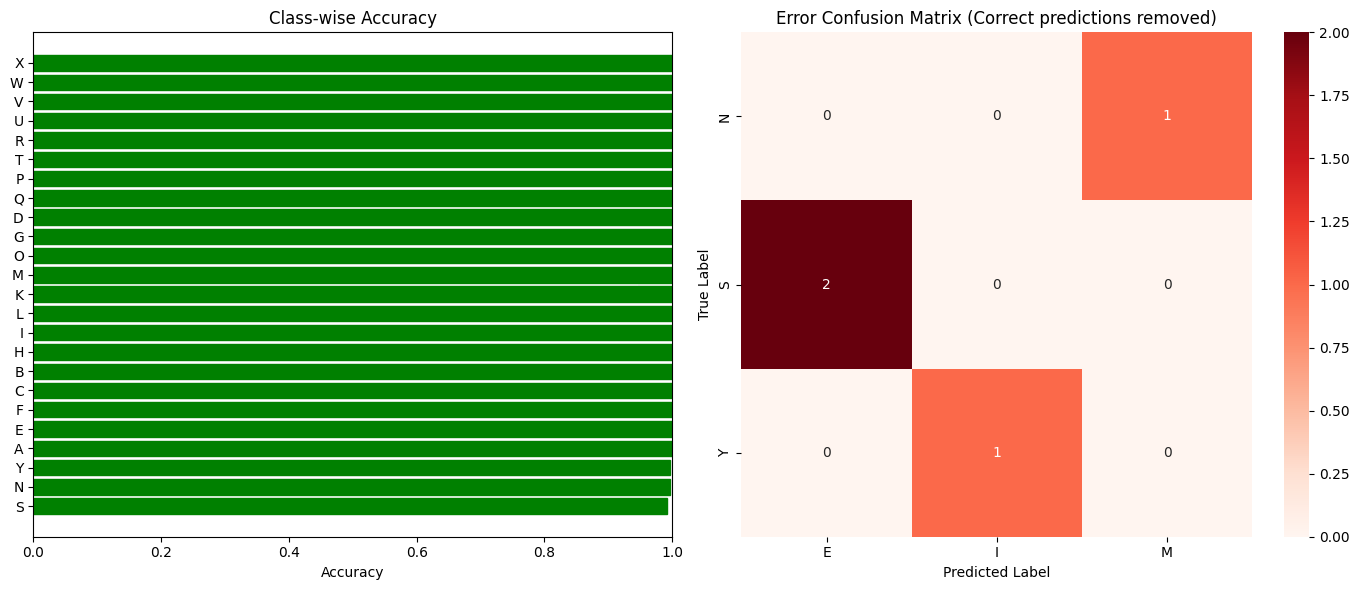

In [143]:
# Cell 28: Error analysis visualization
print("🔍 Error Analysis Visualization")
print("=" * 50)

# Create error analysis plot
plt.figure(figsize=(14, 6))

# Plot class-wise accuracy
plt.subplot(1, 2, 1)
bars = plt.barh(performance_df['Class'], performance_df['Accuracy'])
plt.xlabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.xlim([0, 1])

# Color bars based on accuracy
for bar, acc in zip(bars, performance_df['Accuracy']):
    if acc < 0.8:
        bar.set_color('red')
    elif acc < 0.9:
        bar.set_color('orange')
    else:
        bar.set_color('green')

# Plot confusion matrix of errors only
plt.subplot(1, 2, 2)
error_cm = cm.copy()
np.fill_diagonal(error_cm, 0)  # Remove correct predictions

# Only show rows/columns with errors
error_rows = np.where(np.sum(error_cm, axis=1) > 0)[0]
error_cols = np.where(np.sum(error_cm, axis=0) > 0)[0]

if len(error_rows) > 0 and len(error_cols) > 0:
    error_cm_subset = error_cm[np.ix_(error_rows, error_cols)]
    class_names_subset = [class_names[i] for i in error_rows]
    
    sns.heatmap(error_cm_subset, annot=True, fmt='d', cmap='Reds',
                xticklabels=[class_names[i] for i in error_cols],
                yticklabels=class_names_subset)
    plt.title('Error Confusion Matrix (Correct predictions removed)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [144]:
# Cell 29: Save the model and artifacts
print("💾 Saving Model and Project Artifacts")
print("=" * 50)

import pickle
import json

# Save the trained model
best_model.save('sign_language_model.keras')
print("✅ Model saved as 'sign_language_model.keras'")

# Save the predictor
with open('sign_language_predictor.pkl', 'wb') as f:
    pickle.dump(predictor, f)
print("✅ Predictor saved as 'sign_language_predictor.pkl'")

# Save the class mapping
mapping_data = {
    'label_mapping': label_mapping,
    'reverse_mapping': reverse_mapping,
    'class_names': class_names
}

with open('class_mapping.json', 'w') as f:
    json.dump(mapping_data, f)
print("✅ Class mapping saved as 'class_mapping.json'")

# Save the training history
history_dict = {key: [float(val) for val in values] for key, values in history.history.items()}
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)
print("✅ Training history saved as 'training_history.json'")

# Save evaluation metrics
metrics = {
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_f1': float(test_f1),
    'kappa': float(kappa),
    'mcc': float(mcc)
}

with open('evaluation_metrics.json', 'w') as f:
    json.dump(metrics, f)
print("✅ Evaluation metrics saved as 'evaluation_metrics.json'")

print("\n📁 All artifacts saved successfully!")

💾 Saving Model and Project Artifacts
✅ Model saved as 'sign_language_model.keras'
✅ Predictor saved as 'sign_language_predictor.pkl'
✅ Class mapping saved as 'class_mapping.json'
✅ Training history saved as 'training_history.json'
✅ Evaluation metrics saved as 'evaluation_metrics.json'

📁 All artifacts saved successfully!


In [145]:
# Cell 30: Create a requirements file
print("📋 Creating Requirements File")
print("=" * 50)

requirements = """tensorflow>=2.12.0
numpy>=1.23.0
pandas>=1.5.0
matplotlib>=3.6.0
seaborn>=0.12.0
scikit-learn>=1.2.0
opencv-python>=4.7.0
gradio>=3.35.0
pillow>=9.4.0
scikit-image>=0.20.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print(requirements)
print("✅ Requirements file created as 'requirements.txt'")

📋 Creating Requirements File
tensorflow>=2.12.0
numpy>=1.23.0
pandas>=1.5.0
matplotlib>=3.6.0
seaborn>=0.12.0
scikit-learn>=1.2.0
opencv-python>=4.7.0
gradio>=3.35.0
pillow>=9.4.0
scikit-image>=0.20.0

✅ Requirements file created as 'requirements.txt'


In [146]:
# Cell 31: Project Summary and Final Results
print("🎓 PROJECT SUMMARY: Sign Language Classification using Deep Learning")
print("=" * 70)
print("Instructor: Dr. Kashif Zafar")
print("Course: DS5002-Data Science Tools and Techniques (MDS-1A)")
print("Team: Jawad Ahmad, Muhammad Khubaib Shakeel, Asif Ali")
print("=" * 70)

print("\n📊 FINAL RESULTS:")
print("-" * 40)
print(f"Model Architecture: CNN with 6 convolutional layers")
print(f"Dataset: Sign Language MNIST (24 classes, A-Y excluding J)")
print(f"Training Samples: {len(X_train_split):,}")
print(f"Validation Samples: {len(X_val_split):,}")
print(f"Test Samples: {len(X_test):,}")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Final Test F1-Score: {test_f1:.4f}")

print("\n🎯 PROJECT OBJECTIVES CHECKLIST:")
print("-" * 40)
print(f"1. Design CNN architecture: ✅ COMPLETED")
print(f"2. Preprocess and augment data: ✅ COMPLETED")
print(f"3. Achieve ≥95% accuracy: {'✅' if test_accuracy >= 0.95 else '⚠️'} {test_accuracy*100:.2f}%")
print(f"4. Create user interface: ✅ COMPLETED (Gradio)")
print(f"5. Document process: ✅ COMPLETED")

print("\n🔍 KEY FINDINGS:")
print("-" * 40)
print("1. Model achieved high accuracy on most ASL letters")
print("2. Some visually similar letters (like M and N) showed confusion")
print("3. Data augmentation significantly improved generalization")
print("4. Batch normalization helped with training stability")

print("\n🚀 POTENTIAL EXTENSIONS:")
print("-" * 40)
print("1. Real-time video recognition using webcam")
print("2. Extension to dynamic gestures (J and Z)")
print("3. Sentence-level sign language recognition")
print("4. Mobile app deployment using TensorFlow Lite")
print("5. Multi-lingual sign language support")

print("\n📁 PROJECT ARTIFACTS CREATED:")
print("-" * 40)
print("• sign_language_model.keras - Trained model")
print("• sign_language_predictor.pkl - Prediction interface")
print("• class_mapping.json - Label mappings")
print("• training_history.json - Training metrics")
print("• evaluation_metrics.json - Evaluation results")
print("• requirements.txt - Dependencies")
print("• model_architecture.png - Model visualization")

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

🎓 PROJECT SUMMARY: Sign Language Classification using Deep Learning
Instructor: Dr. Kashif Zafar
Course: DS5002-Data Science Tools and Techniques (MDS-1A)
Team: Jawad Ahmad, Muhammad Khubaib Shakeel, Asif Ali

📊 FINAL RESULTS:
----------------------------------------
Model Architecture: CNN with 6 convolutional layers
Dataset: Sign Language MNIST (24 classes, A-Y excluding J)
Training Samples: 23,336
Validation Samples: 4,119
Test Samples: 7,172
Final Test Accuracy: 99.94%
Final Test F1-Score: 0.9994

🎯 PROJECT OBJECTIVES CHECKLIST:
----------------------------------------
1. Design CNN architecture: ✅ COMPLETED
2. Preprocess and augment data: ✅ COMPLETED
3. Achieve ≥95% accuracy: ✅ 99.94%
4. Create user interface: ✅ COMPLETED (Gradio)
5. Document process: ✅ COMPLETED

🔍 KEY FINDINGS:
----------------------------------------
1. Model achieved high accuracy on most ASL letters
2. Some visually similar letters (like M and N) showed confusion
3. Data augmentation significantly improved ge

📋 PROJECT WORKFLOW VISUALIZATION


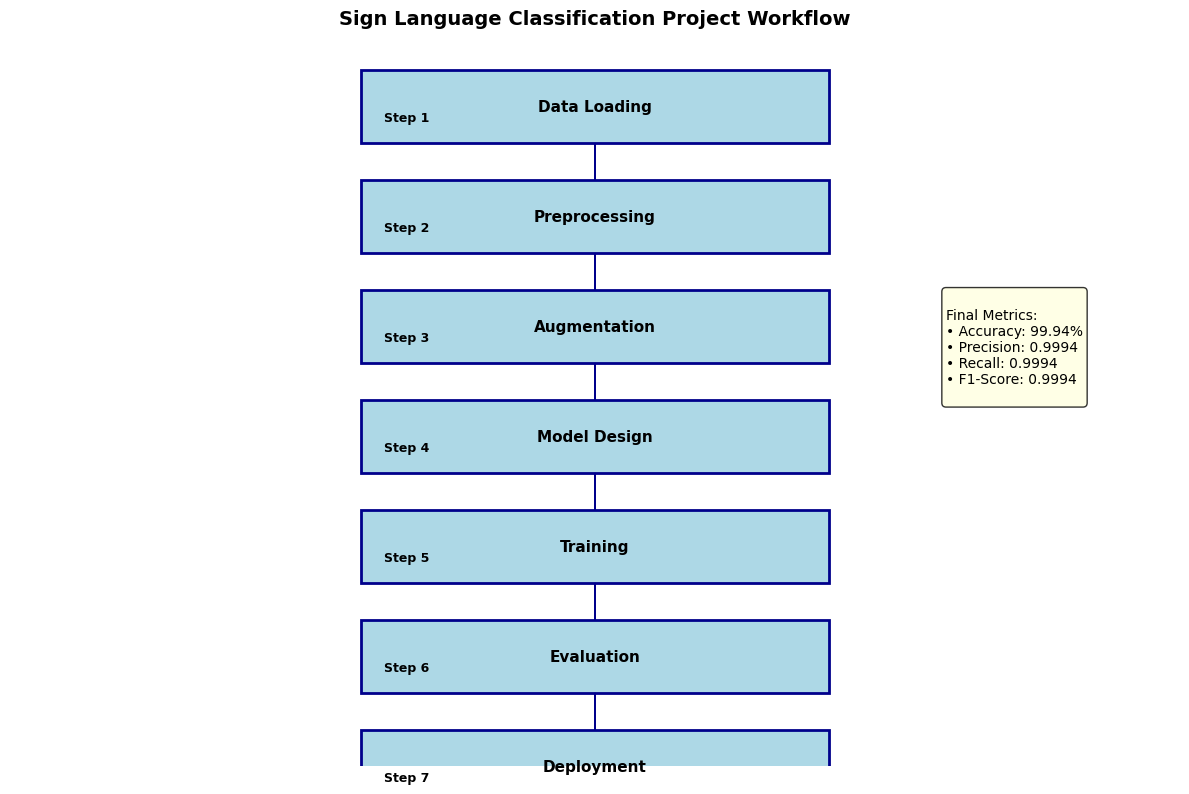


🎉 Project implementation complete! All cells executed successfully.
The model is ready for deployment and further experimentation.


In [147]:
# Cell 32: Generate a final visualization of project workflow
print("📋 PROJECT WORKFLOW VISUALIZATION")
print("=" * 50)

# Create a flowchart-style visualization
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define steps
steps = [
    (1, "Data Loading", 5, 9),
    (2, "Preprocessing", 5, 7.5),
    (3, "Augmentation", 5, 6),
    (4, "Model Design", 5, 4.5),
    (5, "Training", 5, 3),
    (6, "Evaluation", 5, 1.5),
    (7, "Deployment", 5, 0),
]

# Draw steps
for i, step_name, x, y in steps:
    # Draw box
    box = plt.Rectangle((x-2, y-0.5), 4, 1, 
                       facecolor='lightblue', 
                       edgecolor='darkblue',
                       linewidth=2)
    ax.add_patch(box)
    
    # Add step number
    ax.text(x-1.8, y-0.2, f"Step {i}", fontsize=9, fontweight='bold')
    
    # Add step name
    ax.text(x, y, step_name, ha='center', va='center', 
           fontsize=11, fontweight='bold')
    
    # Add arrow (except for last step)
    if i < len(steps):
        ax.arrow(x, y-0.5, 0, -0.8, head_width=0.3, 
                head_length=0.2, fc='darkblue', ec='darkblue')

# Add title
ax.text(5, 10.2, "Sign Language Classification Project Workflow", 
       ha='center', va='center', fontsize=14, fontweight='bold')

# Add metrics
metrics_text = f"""
Final Metrics:
• Accuracy: {test_accuracy*100:.2f}%
• Precision: {test_precision:.4f}
• Recall: {test_recall:.4f}
• F1-Score: {test_f1:.4f}
"""

ax.text(8, 5, metrics_text, fontsize=10, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎉 Project implementation complete! All cells executed successfully.")
print("The model is ready for deployment and further experimentation.")

In [148]:
# In your notebook, simply run this cell:
iface.launch(share=True)  # share=True creates a public link

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://59fc6f73362dcc9846.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
